In [ ]:
from scoresbibm.src.utils.data_utils import query, get_summary_df, load_model
from scoresbibm.src.utils.plot import plot_metric_by_num_simulations, use_style,multi_plot

from scoresbibm.src.tasks import get_task

import matplotlib.pyplot as plt

import jax 
import jax.numpy as jnp
import numpy as np

In [ ]:
jax.devices()

[cuda(id=0)]

In [4]:
PATH = "../../../../results/example_all_cond_vesde"

In [5]:
df = query(PATH)
df

,method,task,num_simulations,seed,model_id,metric,value,time_train,time_eval,cfg
0,score_transformer,two_moons_all_cond,100000,0,0,none,NaN,5046.531780,NaN,"{'name': 'example_all_cond_vesde', 'seed': 0, ..."
1,score_transformer,slcp_all_cond,100000,0,1,none,NaN,6135.606298,NaN,"{'name': 'example_all_cond_vesde', 'seed': 0, ..."
2,score_transformer,two_moons_all_cond,1000,0,2,none,NaN,135.363005,NaN,"{'name': 'example_all_cond_vesde', 'seed': 0, ..."


In [9]:
model = load_model(PATH, 0)


In [10]:

condition_mask_posterior = np.array([False, False, True, True])
condition_mask_missing_data_posterior = np.array([False, False, True, False])
condition_mask_missing_data_posterior2 = np.array([False, False, False, True])
condition_mask_likelihood = np.array([True, True, False, False])
condition_mask_mixed = np.array([True, False, False, True])
observation_posterior = jnp.array([0., 0.])

In [11]:
task = get_task("two_moons_all_cond")

In [12]:
ref_model = task.get_reference_sampler()

joint_samples = ref_model.sample(2000, x_o=jnp.array([]),condition_mask=jnp.zeros((4,)), rng = jax.random.PRNGKey(0))

In [41]:
alphas, cov = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_posterior, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [42]:
alphas2, cov2 = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_likelihood, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [43]:
alphas3, cov3 = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_mixed, rng=jax.random.PRNGKey(0))

Sampling method:  sde


Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [44]:
alphas4, cov4 = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_missing_data_posterior, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [45]:
alphas5, cov5 = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_missing_data_posterior2, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [48]:
jnp.save("alphas.npy", alphas)
jnp.save("cov.npy", cov)
jnp.save("alphas2.npy", alphas2)
jnp.save("cov2.npy", cov2)
jnp.save("alphas3.npy", alphas3)
jnp.save("cov3.npy", cov3)
jnp.save("alphas4.npy", alphas4)
jnp.save("cov4.npy", cov4)
jnp.save("alphas5.npy", alphas5)
jnp.save("cov5.npy", cov5)

In [ ]:
alphas = jnp.load("alphas.npy")
cov = jnp.load("cov.npy")
alphas2 = jnp.load("alphas2.npy")
cov2 = jnp.load("cov2.npy")
alphas3 = jnp.load("alphas3.npy")
cov3 = jnp.load("cov3.npy")
alphas4 = jnp.load("alphas4.npy")
cov4 = jnp.load("cov4.npy")
alphas5 = jnp.load("alphas5.npy")
cov5 = jnp.load("cov5.npy")

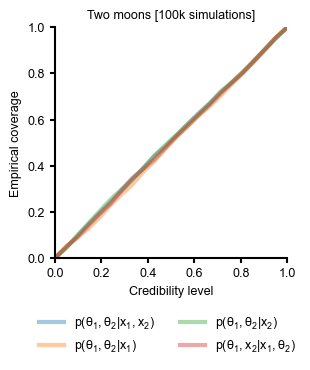

In [50]:
with use_style("pyloric"):
    fig = plt.figure(figsize=(3, 3))
    plt.plot(alphas, cov, lw=3, label=r"$p(\theta_1, \theta_2|x_1, x_2)$", alpha=0.4)
    plt.plot(alphas3, cov3, lw=3, label=r"$p(\theta_1, \theta_2|x_1)$", alpha=0.4)
    plt.plot(alphas4, cov4, lw=3, label=r"$p(\theta_1, \theta_2|x_2)$", alpha=0.4)
    plt.plot(alphas5, cov5, lw=3, label=r"$p(\theta_1, x_2|x_1, \theta_2)$", alpha=0.4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("Credibility level")
    plt.ylabel("Empirical coverage")
    plt.title("Two moons [100k simulations]")
    fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.25))
    fig.savefig("coverage_two_moons_100k.svg")
    fig.savefig("coverage_two_moons_100k.png")
    plt.show()

In [6]:
model = load_model(PATH, 2)

In [13]:
alphas_1k, cov_1k = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_posterior, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [14]:
alphas2_1k, cov2_1k = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_likelihood, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [15]:
alphas3_1k, cov3_1k = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_mixed, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [16]:
alphas4_1k, cov4_1k = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_missing_data_posterior, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [17]:
alphas5_1k, cov5_1k = model.compute_coverage_statistic(joint_samples, condition_mask=condition_mask_missing_data_posterior2, rng=jax.random.PRNGKey(0))

Sampling method:  sde
Finished sampling
Finished computing true log probs
Finished computing sample log probs for batch  0
Finished computing sample log probs for batch  1
Finished computing sample log probs for batch  2
Finished computing sample log probs for batch  3
Finished computing sample log probs for batch  4
Finished computing sample log probs for batch  5
Finished computing sample log probs for batch  6
Finished computing sample log probs for batch  7


In [18]:
jnp.save("alphas_1k.npy", alphas_1k)
jnp.save("cov_1k.npy", cov_1k)
jnp.save("alphas2_1k.npy", alphas2_1k)
jnp.save("cov2_1k.npy", cov2_1k)
jnp.save("alphas3_1k.npy", alphas3_1k)
jnp.save("cov3_1k.npy", cov3_1k)
jnp.save("alphas4_1k.npy", alphas4_1k)
jnp.save("cov4_1k.npy", cov4_1k)
jnp.save("alphas5_1k.npy", alphas5_1k)
jnp.save("cov5_1k.npy", cov5_1k)

In [19]:
alphas_1k = jnp.load("alphas_1k.npy")
cov_1k = jnp.load("cov_1k.npy")
alphas2_1k = jnp.load("alphas2_1k.npy")
cov2_1k = jnp.load("cov2_1k.npy")
alphas3_1k = jnp.load("alphas3_1k.npy")
cov3_1k = jnp.load("cov3_1k.npy")
alphas4_1k = jnp.load("alphas4_1k.npy")
cov4_1k = jnp.load("cov4_1k.npy")
alphas5_1k = jnp.load("alphas5_1k.npy")
cov5_1k = jnp.load("cov5_1k.npy")

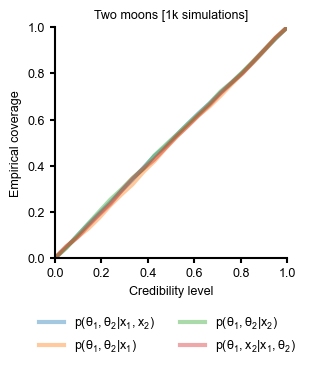

In [22]:
with use_style("pyloric"):
    fig = plt.figure(figsize=(3, 3))
    plt.plot(alphas_1k, cov_1k, lw=3, label=r"$p(\theta_1, \theta_2|x_1, x_2)$", alpha=0.4)
    plt.plot(alphas3_1k, cov3_1k, lw=3, label=r"$p(\theta_1, \theta_2|x_1)$", alpha=0.4)
    plt.plot(alphas4_1k, cov4_1k, lw=3, label=r"$p(\theta_1, \theta_2|x_2)$", alpha=0.4)
    plt.plot(alphas5_1k, cov5_1k, lw=3, label=r"$p(\theta_1, x_2|x_1, \theta_2)$", alpha=0.4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("Credibility level")
    plt.ylabel("Empirical coverage")
    plt.title("Two moons [1k simulations]")
    fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.25))
    fig.savefig("coverage_two_moons_1k.svg")
    fig.savefig("coverage_two_moons_1k.png")
    plt.show()